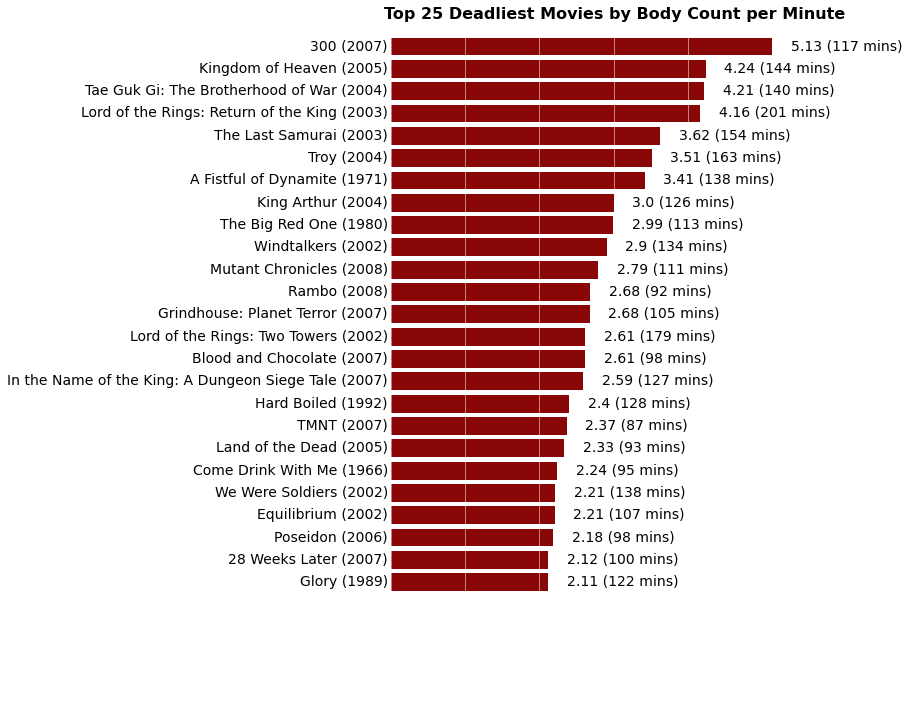

In [4]:
from pandas import *

# Read the data into a pandas DataFrame
body_count_data = read_csv("http://files.figshare.com/1332945/film_death_counts.csv")

# Divide the body counts by the length of the film
body_count_data["Deaths_Per_Minute"] = (body_count_data["Body_Count"].apply(float).values /
                                            body_count_data["Length_Minutes"].values)

# Only keep the top 25 highest kills per minute films
body_count_data = body_count_data.sort("Deaths_Per_Minute", ascending=False)[:25]

# Change the order of the data so highest kills per minute films are on top in the plot
body_count_data = body_count_data.sort("Deaths_Per_Minute", ascending=True)

# Generate the full titles for the movies: movie name (year)
full_title = []

for film, year in zip(body_count_data["Film"].values, body_count_data["Year"].values):
    full_title.append(film + " (" + str(year) + ")")
    
body_count_data["Full_Title"] = array(full_title)

fig = plt.figure(figsize=(8,12))

# Plot the red horizontal bars
rects = plt.barh(range(len(body_count_data["Deaths_Per_Minute"])),
                    body_count_data["Deaths_Per_Minute"],
                    height=0.8,
                    align="center",
                    color="#8A0707",
                    edgecolor="none")

# This function adds the deaths per minute label to the right of the bars
def autolabel(rects):
    for i, rect in enumerate(rects):
        width = rect.get_width()
        label_text = (str(round(float(width), 2)) +
                        " (" + str(body_count_data["Length_Minutes"].values[i]) +
                        " mins)")
        
        plt.text(width + 0.25,
                    rect.get_y() + rect.get_height() / 2.,
                    label_text,
                    ha="left",
                    va="center",
                    fontsize=14)

autolabel(rects)

# Add the film labels to left of the bars (y-axis)
yticks(range(len(body_count_data["Full_Title"])), body_count_data["Full_Title"].values, fontsize=14)

# Don't have any x tick labels
xticks(arange(0, 5, 1), [""])

# Plot styling

# Remove the plot frame lines
ax = axes()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# y-axis ticks on the left and x-axis ticks on the bottom
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()

# Color the y-axis ticks the same dark red color, and the x-axis ticks white
ax.tick_params(axis="y", color="#8A0707")
ax.tick_params(axis="x", color="white")

# Don't show the x axis tick markers
ax.xaxis.grid(color="white", linestyle="-")
plt.title("Top 25 Deadliest Movies by Body Count per Minute", weight="bold", size=16)

plt.show()